<a href="https://colab.research.google.com/github/AndreMacielSousa/22292-Deep-Learning-Aplicado/blob/main/DL_CHA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Listing 2.1


**Deep Learning SIMPLIFIED**

https://www.youtube.com/watch?v=EzbGiB_6TSI&list=PLjJh1vlSEYgvGod9wWiydumYl8hOXixNu&index=13&ab_channel=DeepLearning.TV




In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
 test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Listing 2.2

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

 To make the model ready for training, we need to pick three more things as part of
the compilation step:
 An optimizer—The mechanism through which the model will update itself based
on the training data it sees, so as to improve its performance.
 A loss function—How the model will be able to measure its performance on the
training data, and thus how it will be able to steer itself in the right direction.
 Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
 model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2580 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1015 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0664 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9890


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 55ms/step


array([3.7600337e-08, 1.3209323e-10, 5.6462077e-06, 3.5292951e-06,
       1.9878446e-12, 2.4578700e-08, 8.2524482e-14, 9.9999005e-01,
       6.3662263e-08, 5.8889674e-07], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9801
test_acc: 0.9800999760627747


This concludes our first example—you just saw how you can build and train a
neural network to classify handwritten digits in less than 15 lines of Python code. In
this chapter and the next, we’ll go into detail about every moving piece we just previewed and clarify what’s going on behind the scenes. You’ll learn about tensors,
the data-storing objects going into the model; tensor operations, which layers are
made of; and gradient descent, which allows your model to learn from its training
examples.

In [ ]:
import numpy as np
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

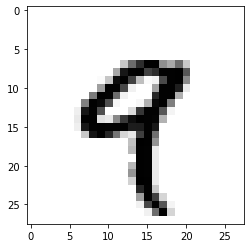


teste = 9


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print("\nteste =", train_labels[4])

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

2.2.8 Real-world examples of data tensors
Let’s make data tensors more concrete with a few examples similar to what you’ll
encounter later. The data you’ll manipulate will almost always fall into one of the following categories:
* Vector data—Rank-2 tensors of shape (samples, features), where each sample
is a vector of numerical attributes (“features”)
* Timeseries data or sequence data—Rank-3 tensors of shape (samples, timesteps,
features), where each sample is a sequence (of length timesteps) of feature
vectors
* Images—Rank-4 tensors of shape (samples, height, width, channels), where
each sample is a 2D grid of pixels, and each pixel is represented by a vector of
values (“channels”)
* Video—Rank-5 tensors of shape (samples, frames, height, width, channels),
where each sample is a sequence (of length frames) of images

In [ ]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time() 
for _ in range(1000):
 z = x + y
 z = np.maximum(z, 0.) 
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor. Reshaping is best understood via simple examples:

In [ ]:
x = np.array([[0., 1.],
 [2., 3.],
 [4., 5.]])

In [ ]:
 x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))

In [ ]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that’s commonly encountered is transposition. Transposing a
matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)